In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
import random
from tqdm import tqdm

In [2]:
def f(x, A, k):
    return A*sin(k*x)

In [10]:
normChiSquareList = []
dt = 0.001
x = [random.uniform(-3 * pi, 3 * pi) for i in range(100)]

for n in tqdm(range(1, 101)):
    A = 5
    k = 0.9 # initial A: 5, k: 0.9
    error = [random.gauss(-0.01 * n, 0.01 * n) for i in range(100)]
    y = [f(x[i], 3, 0.5) + error[i] for i in range(100)] # A_answer: 3, k_answer: 0.5
    
    lossHistory = []
    AHistory = []
    kHistory = []

    for i in range(10000):
        kGrad = [-2 * (y[i] - f(x[i], A, k)) * A * x[i] * cos(k*x[i]) for i in range(len(y))]
        AGrad = [-2 * (y[i] - f(x[i], A ,k)) * sin(k * x[i]) for i in range(len(y))]

        k -= sum(kGrad) / len(kGrad) * dt
        A -= sum(AGrad) / len(AGrad) * dt

    chiSquare_i = [((y[j] - f(x[j], A, k)) ** 2) / (error[j] ** 2) for j in range(100)]
    normChiSquareList.append(sum(chiSquare_i) / 100)


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


In [11]:
print(normChiSquareList)

141.34261670570743
[2.493071732672856, 2.045195231711074, 3.647634895904942, 1.0170001319857234, 1.0234785447663568, 1.2660511289499707, 1.6761329844518478, 2.823693602981783, 1.196289338023863, 2.3753366621997203, 1.9189290450687309, 5.905660867836912, 1.2882806815562053, 1.2007743405069737, 1.249843585571782, 1.0702938347651507, 17.93712137392968, 130.41271818418645, 2.208340615345917, 4.539050862594556, 1.007882798166008, 19.077966216893117, 1.2165776865675766, 17.19367676795267, 1.0586502106466187, 8.76883695067692, 1.2680980059685192, 36.28580766610989, 2.032855409809332, 1.4109158087801823, 1.7723466747782965, 2.499918425293623, 8.518780741308884, 4.636421460087558, 983.1510828658812, 5.982051841563641, 1.196513633526037, 6.786424736320725, 1.8646957359159853, 1.0968572558373952, 1.246051616521737, 7131.0826211962, 2.0381342792245114, 1.3524914245493318, 3.21982351007388, 4.178819273832322, 6.131566030703893, 3.8388456937501174, 4.469201676988219, 1.0130173552509563, 3.8873123898

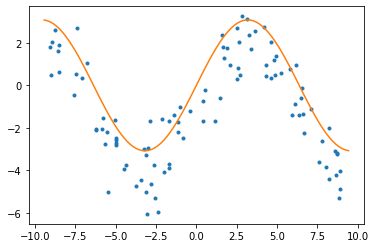

3.0778371564214715 0.49320237231663266


In [12]:
plt.plot(x, y, '.')
xForPlot = np.linspace(-3 * pi, 3 * pi, 100)
yForPlot = np.zeros([100], float)
for i in range(len(yForPlot)):
    yForPlot[i] = f(xForPlot[i], A, k)

plt.plot(xForPlot, yForPlot, '-')
plt.show()
print(A, k)

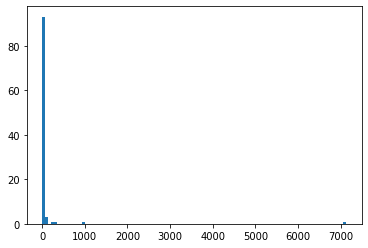

In [13]:
plt.hist(normChiSquareList, bins=100)
plt.show()